In [ ]:
import pandas as pd 
df= pd.read_csv('sample_data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.dropna(axis=1)

In [ ]:
df.shape


(569, 32)

In [ ]:
df['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])


In [ ]:
df['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


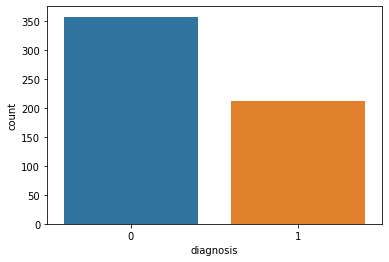

In [ ]:
import seaborn as sns 

sns.countplot(df['diagnosis'], label="count")

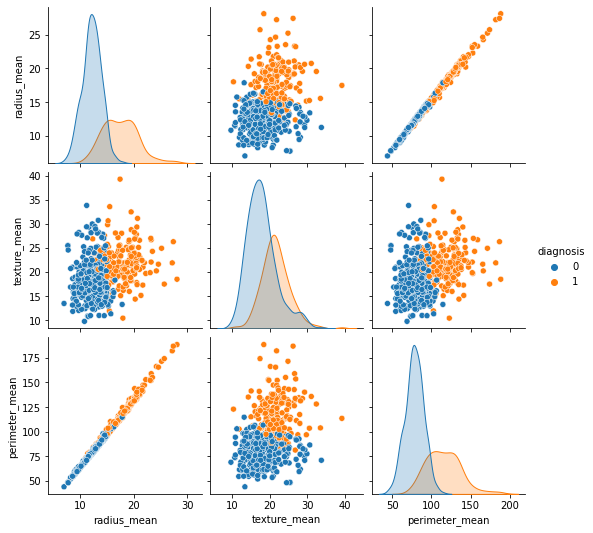

In [ ]:
# 1:5 = 2-4, yaitu radius_mean, texture_mean, perimeter_mean
sns.pairplot(df.iloc[:,1:5], hue="diagnosis")

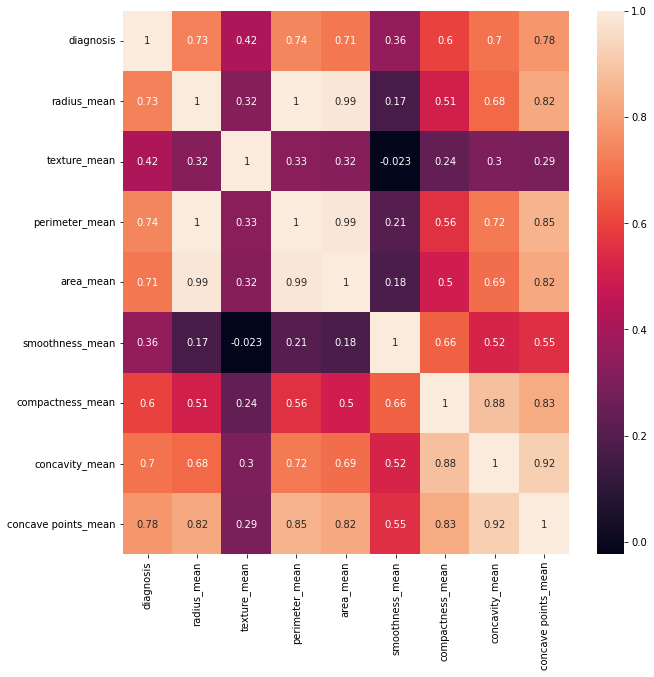

In [ ]:
# corr
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:10].corr(), annot=True)

In [ ]:
#Features and Label 

X= df.drop(['diagnosis'], axis = 1) # ini bisa juga pake df.iloc[:, 2:31].values
y = df['diagnosis'] # ini bisa juga pake df.iloc[:,1].values

In [ ]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
# scalling 

from sklearn.preprocessing import StandardScaler

model = StandardScaler()
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

In [ ]:
def models(X_train, y_train):
  #1 Logitic Regression 
  from sklearn.linear_model import LogisticRegression
  logistic = LogisticRegression()
  logistic.fit(X_train, y_train)

  #2 DecisionTreeClassifier
  from sklearn.tree import DecisionTreeClassifier
  tree= DecisionTreeClassifier(random_state=0, criterion = 'entropy')
  tree.fit(X_train, y_train)

  #3 RandomForest
  from sklearn.ensemble import RandomForestClassifier
  forest= RandomForestClassifier(random_state=0, criterion = 'entropy', n_estimators=10)
  forest.fit(X_train, y_train)

  #4 KNeighbors Classifier
  from sklearn.neighbors import KNeighborsClassifier 
  neighbors = KNeighborsClassifier()
  neighbors.fit(X_train, y_train)

  print('Logistic Regression Accuracy: ', logistic.score(X_train, y_train))
  print('Decision Tree Accuracy:', tree.score(X_train, y_train))
  print('Random Forest Accuracy:', forest.score(X_train, y_train))
  print('KNeighbors Accuracy:', neighbors.score(X_train, y_train))

  return logistic,tree, forest, neighbors

In [ ]:
model = models(X_train , y_train)

Logistic Regression Accuracy:  0.9912087912087912
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
KNeighbors Accuracy: 0.978021978021978


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
for i in range(len(model)):
  print('Model', i)
  print('Accuracy:', accuracy_score(y_test, model[i].predict(X_test)))
  print(classification_report(y_test, model[i].predict(X_test)))

Model 0
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       0.95      1.00      0.97        38

    accuracy                           0.98       114
   macro avg       0.97      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

Model 1
Accuracy: 0.9122807017543859
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        76
           1       0.82      0.95      0.88        38

    accuracy                           0.91       114
   macro avg       0.89      0.92      0.90       114
weighted avg       0.92      0.91      0.91       114

Model 2
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        76
           1       0.95      0.95      0.95        38

    accuracy                           0.96       114
   macro avg     

In [ ]:
#evaluasi model performance 
y_pred = model[1].predict(X_test)
print(y_pred)



[1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0
 0 0 0]


In [ ]:
# save to joblib 

from joblib import dump, load
pickle = './Latihan4_Classification_BreastCancer.joblib'
